## SIMPLE PERCEPTRON WITH THE MNIST DATASET

MNIST set is a large collection of handwritten digits. It is a very popular dataset in the field of image processing. The objective of this notebook is to use the perceptron in order to classify a set of images based on the number that appears on that image.

### 1. Read and visualize the dataset

In [7]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',  as_frame=False)

C:\Users\Ihona\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
28*28 # 28 x 28 pixels

784

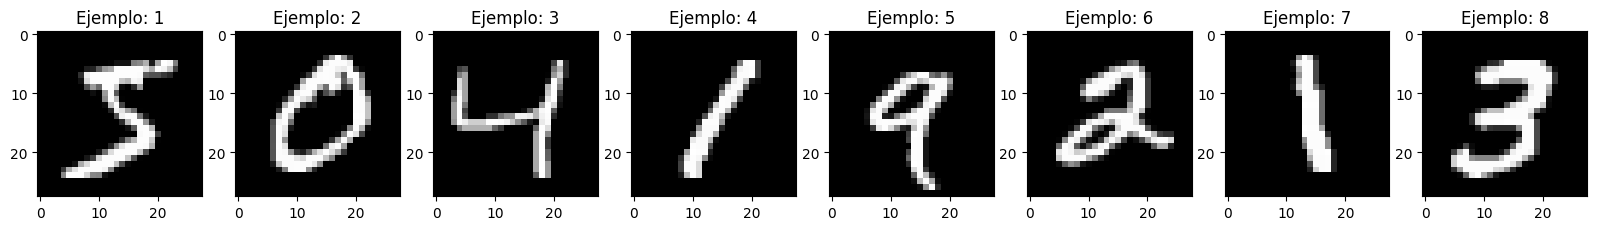

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('Ejemplo: ' + str(index))
plt.show()

An image can be classified in 10 classes: numbers from 0 to 9. Therefore, the perceptron will require more neurons in the layer, since this is not a binary classification. 
In this case, the perceptron will have 10 neurons in our output layer.

In [6]:
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Dataset division

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1)

### 3. Algorithm training

In [12]:
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=2000, random_state=40, n_jobs=-1)
clf.fit(X_train, y_train)

Perceptron(max_iter=2000, n_jobs=-1, random_state=40)

In [20]:
# We have 784 input features 
#For each neuron we'll have 784 parameters
#Since we have 10 neurons we'll have 784*10 parameters + 10 (for the bias term)

In [21]:
clf.coef_.shape # Number of parameters that form the model

(10, 784)

In [14]:
clf.intercept_ #Bias

array([ -1145.,   -460.,  -1679.,  -4003.,   -860.,   1091.,  -3034.,
         -156., -10411.,  -4222.])

### 4. Prediction

In [15]:
# Prediction on the test set
y_pred = clf.predict(X_test)

In [16]:
len(y_test)

7000

In [17]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average="weighted")

0.8529362939947941

In [18]:
# Let's show the bad classified images

import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

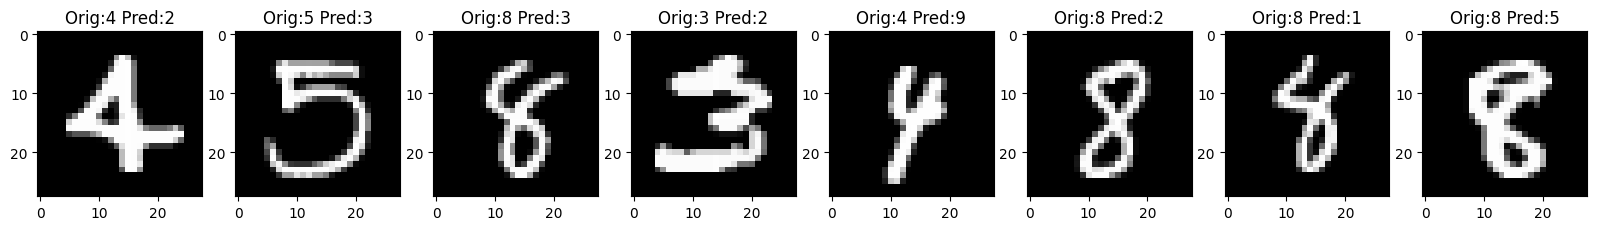

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test[img_index], (28,28)), cmap=plt.cm.gray)
    plt.title('Orig:' + str(y_test[img_index]) + ' Pred:' + str(y_pred[img_index]))
plt.show()